Design Tic Tac Toe
1. System requirements
    - Two players should be able to play ttt
    - Board can be a square of side length >=3
    - AI/Web component can be plugged easily to the core components
        - Player can be AI or computer
    - System should be easily testable
2. Actors and use cases
    - Player : Creates or joins a game, makes a move, wins or looses or draws a game
3. Classes
    - Player
        - Players name, count of won, draw and lost games
    - Game
        - Processes the players move and updates game board
    - Board
        - Holds the cells which contains marks 
    - Move
        - Represents a mark and its position made by player

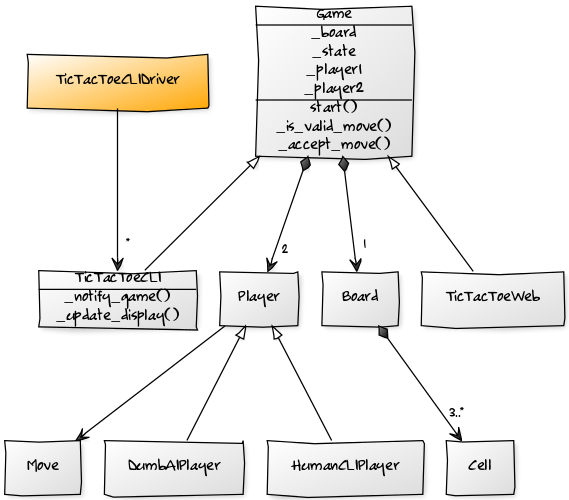

In [246]:
from abc import ABC, abstractmethod
from copy import deepcopy
from IPython.display import clear_output

class Player(ABC):
    def __init__(self, name, mark, played=0, wins=0, draws=0):
        self.name = name
        self.played = played
        self.wins = wins
        self.draws = draws
        self.mark = mark
        
    @abstractmethod    
    def play(self, board):
        pass

class Game(ABC):
    def __init__(self, board, player_1, player_2):
        self._board = board
        self._state = GameState.READY
        self._player_1 = player_1
        self._player_2 = player_2
        self._winner = None
        self._accepted_moves = 0
    
    def start(self):
        self._state = GameState.PLAYING
        
        self._player_1.played = self._player_1.played+1
        self._player_2.played = self._player_2.played+1
        
        current_player = self._player_1
        invalid_move = False
        
        while self._state == GameState.PLAYING:
            if not invalid_move:
                self._update_display()
            ## pass copy of board to player
            move = current_player.play(deepcopy(self._board))
            if self._is_valid_move(current_player, move):
                invalid_move = False
                self._accept_move(current_player, move)
                current_player = self._player_1 if current_player == self._player_2 else self._player_2
            else:
                self._notify_game('Invalid move by %s , try again' % (current_player.name))
                invalid_move = True
        self._update_display()
        if self._state == GameState.DRAW:
            self._notify_game('Game is Draw')
            self._player_1.draws = self._player_1.draws+1
            self._player_2.draws = self._player_2.draws+1
        elif self._state == GameState.WON:
            self._notify_game('%s has won !!!' % (self._winner.name) )
            self._winner.wins = self._winner.wins+1
    
    def _is_valid_move(self,player, move):
        if move.mark != player.mark:
            print(1)
            return False
        if self._board.cells[move.index].mark != Mark.BLANK:
            print(2)
            return False
        return True
    
    def _accept_move(self, current_player, move):
        self._board.cells[move.index].mark = current_player.mark
        # check row, col, diagonal and anti-diagonal
        row = move.index // self._board.size
        col = move.index % self._board.size
        
        streak_count = 0
        for c in range(self._board.size):
            if self._board.cells[row*self._board.size+c].mark == current_player.mark:
                streak_count+=1
            else:
                break
        if streak_count < self._board.size:
            streak_count = 0
            for r in range(self._board.size):
                if self._board.cells[r*self._board.size+col].mark == current_player.mark:
                    streak_count+=1
                else:
                    break
        if streak_count < self._board.size and row == col:
            streak_count = 0
            for x in range(self._board.size):
                if self._board.cells[x*(self._board.size)+x].mark == current_player.mark:
                    streak_count+=1
                else:
                    break
        if streak_count < self._board.size and row == self._board.size - col:
            streak_count = 0
            for x in range(self._board.size):
                if self._board.cells[(self._board.size)*x+(self._board.size-x)].mark == current_player.mark:
                    streak_count+=1
                else:
                    break
        if streak_count == self._board.size:
            self._state = GameState.WON
            self._winner = current_player
        if self._accepted_moves == self._board.size*self._board.size:
            self._state = GameState.DRAW
                    
    @abstractmethod
    def _notify_game(self, message):
        pass
    
    @abstractmethod
    def _update_display(self):
        pass
        
        
class HumanCLIPlayer(Player):
    def play(self, board):
        valid = False
        while not valid :
            cell_number = input('Choose a cell from 1 to %d : ' % (board.size*board.size))
            if not cell_number.isnumeric():
                print('Enter a number please!')
            elif int(cell_number) < 1 or int(cell_number) > (board.size*board.size):
                print('Enter number in range please!')
            else:
                valid = True
        cell_number = int(cell_number)
        return Move(cell_number, self.mark)
        
        
class DumbAIPlayer(Player):
    def play(self, board):
        # chooses first empty spot
        for index, cell in enumerate(board.cells):
            if cell.mark == Mark.BLANK:
                return Move(index+1, self.mark)
            
            
class TicTacToeCLI(Game):
    
    def _notify_game(self, message):
        print('\n'+message+'\n')
        
    def _update_display(self):
        SEPARATOR = '-'*self._board.size*2
        clear_output()
        print(SEPARATOR)
        print('\n')
        for row in range(self._board.size):
            print('|'.join([cell.mark.value for cell in\
                            self._board.cells[row*self._board.size : row*self._board.size + self._board.size]]))
            print('\n')
            print(SEPARATOR)
            print('\n')

        
class TicTacToeWeb(Game):
    def _notify_game(self, message):
        # show on each users web page
        pass
    def _update_display(self):
        # update the tic tac toe view on web page of user
        pass
        
# enum(s)

import enum

class Mark(enum.Enum):
    BLANK = '.'
    ZERO  = '0'
    CROSS = 'X'
    
class GameState(enum.Enum):
    READY = 0
    PLAYING = 1
    DRAW = 2
    WON = 3

class MoveState(enum.Enum):
    VALID = 0
    INVALID = 1
    
# data objects

class Move(object):
    def __init__(self, number, mark):
        self.index = number - 1
        self.mark = mark
    
class Board(object):
    def __init__(self, size):
        self.size = size
        self.cells = [Cell() for x in range(size*size)]

class Cell(object):
    def __init__(self):
        self.mark = Mark.BLANK

In [ ]:
class TicTacToeCLIDriver(object):
    
    def __init__(self):
        pass
    
    def start(self):
        name_p1 = input('Player 1 enter your name : ')
        mark_p1_choice = input('%s, choose Zero or Cross (Press O for Zero) : '%(name_p1))
        ai_play = input('Do you want to play with AI ? (Enter Y if yes) : ')
        size = int(input('What size of tik toc game do you want to play? : '))
        
        mark_p1 = None
        mark_p2 = None
        if mark_p1_choice.lower() == 'o' or mark_p1_choice.lower() == '0':
            mark_p1 = Mark.ZERO
            mark_p2 = Mark.CROSS
        else:
            mark_p2 = Mark.ZERO
            mark_p1 = Mark.CROSS
            
        p1 = HumanCLIPlayer(name_p1, mark_p1)
        p2 = None
        if ai_play.lower() == 'y':
            p2 = DumbAIPlayer('Robot', mark_p2)
        else:
            name_p2 = input('Player 2 enter your name : ')
            p2 = HumanCLIPlayer(name_p2, mark_p2)
    
        while (input('Start a Tik Toc Toe game ? Y for Yes : ')).lower() == 'y':
            board = Board(size)
            game = TicTacToeCLI(board, p1, p2)
            game.start()
            
if __name__ == '__main__':
    cli_driver = TicTacToeCLIDriver()
    cli_driver.start()
       